In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.linspace(0,1,1000)

In [14]:
def phi(x,x0,w,v):
    ret=np.zeros_like(x)
    ret[(x>(x0-w)) & (x<=(x0))]=((x-x0+w)/w*v)[(x>(x0-w)) & (x<=(x0))]
    ret[(x<(x0+w)) & (x>(x0))]=((x0+w-x)/w*v)[(x<(x0+w)) & (x>(x0))]
    return(ret)

<IPython.core.display.Javascript object>


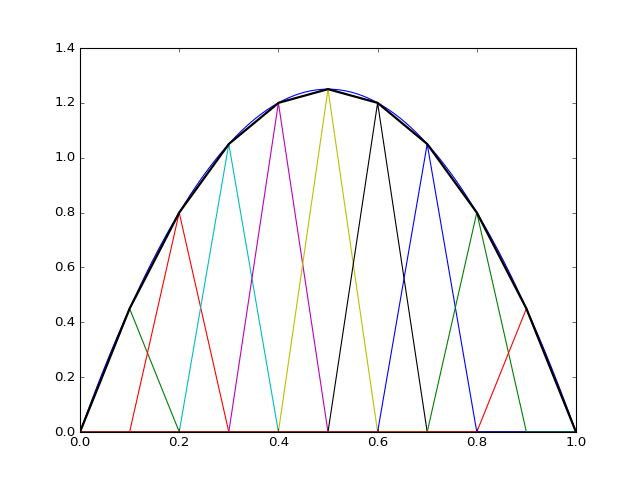

In [46]:
%matplotlib notebook
y=-5*(x-.5)*(x-.5)+1.25

plt.plot(x,y)
ll=np.zeros_like(x)
for i in range(1,10):
    lf=phi(x,.1*i,.1,-5*(.1*i-.5)*(.1*i-.5)+2.5/2)
    ll+=lf
    plt.plot(x,lf)
plt.plot(x,ll,"k",linewidth=2.0)
#plt.ylim(0,1.5)

In [39]:
y

array([ -1.25000000e-02,  -1.00050025e-02,  -7.52497492e-03,
        -5.05985729e-03,  -2.60958971e-03,  -1.74112431e-04,
         2.24663419e-03,   4.65270967e-03,   7.04417341e-03,
         9.42108467e-03,   1.17835026e-02,   1.41314863e-02,
         1.64650946e-02,   1.87843864e-02,   2.10894203e-02,
         2.33802548e-02,   2.56569484e-02,   2.79195594e-02,
         3.01681461e-02,   3.24027664e-02,   3.46234783e-02,
         3.68303397e-02,   3.90234083e-02,   4.12027416e-02,
         4.33683971e-02,   4.55204322e-02,   4.76589041e-02,
         4.97838700e-02,   5.18953867e-02,   5.39935112e-02,
         5.60783002e-02,   5.81498103e-02,   6.02080981e-02,
         6.22532199e-02,   6.42852320e-02,   6.63041906e-02,
         6.83101516e-02,   7.03031710e-02,   7.22833045e-02,
         7.42506079e-02,   7.62051366e-02,   7.81469460e-02,
         8.00760916e-02,   8.19926284e-02,   8.38966115e-02,
         8.57880959e-02,   8.76671363e-02,   8.95337875e-02,
         9.13881041e-02,